<a href="https://colab.research.google.com/github/NYUExperimentalPhysics1-2021/lab3-data-repository-Cormwell4/blob/main/LabAnalysis3_Alex_Davis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As in other assignments, run this first code block to import necessary libraries

In [3]:
# necessary libraries
import numpy as np
import matplotlib.pyplot as plt


#Create your data array

Create a spreadsheet (use google sheets, ms excel, whatever you want) duplicating the table in your lab book. Include a header row. Save the spreadsheet in tab delimited text format as lab3data.txt (Also save a copy in the native format - e.g. .xlsx for excel). If you use google sheets, download a "tab separated value" file then change the ".tsv" extension to ".txt"

**Make sure you use a consistent unit for the energy** IE if the energy change is 2.14 mJ, you could either enter .00214 (units are Joules) or 2.14 (units are mJ) but use the same choice throughout. 

Upload this spreadsheet to your lab3-data-repository (https://github.com/NYUExperimentalPhysics1-2021/lab3-data-repository-yourgithubname) archive on github

Then change the line that starts !wget to use the correct repository name

When you run this, you should see your data displayed

In [4]:
!wget -nc https://raw.githubusercontent.com/NYUExperimentalPhysics1-2021/lab3-data-repository-Cormwell4/main/lab3datasheet-Sheet1.txt
!more lab3datasheet-Sheet1.txt

--2021-11-22 03:53:10--  https://raw.githubusercontent.com/NYUExperimentalPhysics1-2021/lab3-data-repository-Cormwell4/main/lab3datasheet-Sheet1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1790 (1.7K) [text/plain]
Saving to: ‘lab3datasheet-Sheet1.txt’

lab3datasheet-Sheet 100%[===================>]   1.75K  --.-KB/s    in 0s      

2021-11-22 03:53:10 (37.3 MB/s) - ‘lab3datasheet-Sheet1.txt’ saved [1790/1790]

PHASE	DURATION	AVGENERGY	.5 CYCLES	ELAPSED TIME	SLOPE LI
FETIME	LIFETIME AMP^2	ENERGY CHANGE	COIL ENERGY	ENERGY LOSS	COILADJ
45	7	4.658	101	103.24	730.48	391.787	1.94	2.497	0.413521
	0.976
45	7	5.169	102	105.928	779.19	945.941	2.522	2.947	0.553	
1.316
45	9	5.882	102	105.0806	710.55	1832.74	1.729	2.335	
0.358	0.894
45	9	3.26	100	104.027	179	779.

#Load the data

The load command below assumes you created the 11 columns listed in the lab handout in the order specified,  that the data file is named "lab3data.txt" and that there is one header row.  If that's not right, edit the line below to make it align with what you did. 

In [5]:
phase, duration, avgnrg, numhalfcycles, elapsedtime, lifetime_s, lifetime_asq, deltanrg, coilnrg, nrgloss,coiladj  = np.loadtxt('lab3datasheet-Sheet1.txt', skiprows = 1, unpack=True)

# Make a scatter plot of calculated coil energy vs calculated mechanical energy and fit the data to a line

the total electical energy the pico calculated is stored in `coilnrg`

the change in the bob's energy is stored in `deltanrg`

the calculated energy lost to damping is stored in `nrgloss`

the mechanical energy imparted to the bob is the change in the bob's energy + the energy lost due to damping (for exaample, if you were putting in exactly what was needed to overcome damping, then the bob's energy change would be 0)

1. Please make a scatter plot with the calculated electrical energy on the x-axis and the calculated energy imparted to the bob on the y-axis. Use blue dots. Don't connect the lines. Label the axes. Make sure you specify whether energy is in Joules or milliJoules, etc. 

Now we'd like to know if there's a simple scaling relation between the calculated electrical and mechanical energies. IE mechanical = a * electrical, where maybe a = 80%. 

`np.polyfit(x,y,1)` will fit the data to a line, but the intercept won't necessarily be through 0. Here physics tells us that if the electrical energy is 0, the mechanical energy added must also be 0. So we need to fit the line $y = a x$, not $y = a x + b$. Fortunately, this is a straightfoward problem. The least-squares solution is

$a = \frac{\sum_i x_i y_i}{\sum_i x_i^2}$

2. Find the best (least-squares) fit for the scaling factor. Draw a black dashed line matching this fit through the data. Title the plot with the scaling factor.


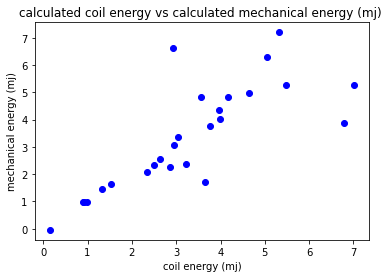

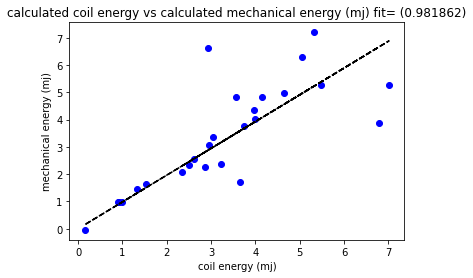

In [6]:
## your answer here
##maybe delete the bottom data point row 
plt.title("calculated coil energy vs calculated mechanical energy (mj) " )
plt.xlabel("coil energy (mj)")
plt.ylabel("mechanical energy (mj)")
x = coilnrg
y = deltanrg + nrgloss
plt.plot(x,y, 'bo')
plt.show()

plt.title

##part 2  of problem
a = np.sum(x*y)/ np.sum(x**2)
fit = a*x
plt.plot(x,y, 'bo')
plt.title("calculated coil energy vs calculated mechanical energy (mj) fit= (%f)" %a)
plt.xlabel("coil energy (mj)")
plt.ylabel("mechanical energy (mj)")

plt.plot(x,fit, "--", color= "k")


#Make a scatter plot of calculated coil energy per $\frac{1}{2}$ cycle vs calculated mechanical energy per $\frac{1}{2}$ and fit the data to a line

the same as above, but this time divide all the energies by the number of half cycles (this is the same as the number of pulses).


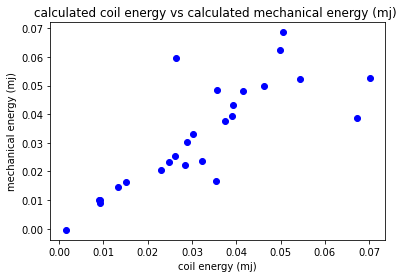

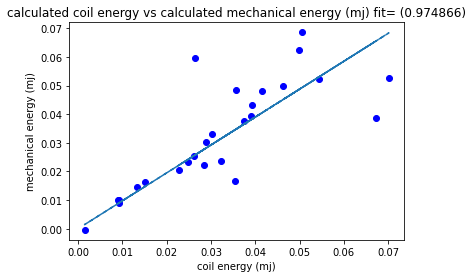

In [7]:
## your answer here
x = coilnrg/numhalfcycles
y = deltanrg/numhalfcycles + nrgloss/numhalfcycles
plt.plot(x,y, 'bo')
plt.title("calculated coil energy vs calculated mechanical energy (mj) " )
plt.xlabel("coil energy (mj)")
plt.ylabel("mechanical energy (mj)")
plt.show()




a = np.sum(x*y)/ np.sum(x**2)
fit = a*x
plt.plot(x,y, 'bo')
plt.title("calculated coil energy vs calculated mechanical energy (mj) fit= (%f)" %a)
plt.xlabel("coil energy (mj)")
plt.ylabel("mechanical energy (mj)")

plt.plot(x,fit, '--')

#Look for systematics

If everything is going well, we wouldn't expect the scaling to depend on things like the size of the pulse or what fraction of the energy is lost to damping. 

1. remake the scatter plot above (per half cycle), including the fit line, but this time use a blue marker if the per energy pulse is above the median (top half) and a red marker if the per energy pulse is below he median (bottom half)

2. Make a new figure. remake the scatter plot above (per half cycle), including the fit line, but this time use a blue marker if the ratio of energy loss to total energy change is above the median (top half) and a red marker if the per energy pulse is below he median (bottom half)

hint: [you can use true/false arrays to index another array](https://numpy.org/doc/stable/user/basics.indexing.html#boolean-or-mask-index-arrays) For instance if x and y are numpy arrays of the same size, `y[x<10]` gives you all values of `y` for which `x < 10`.



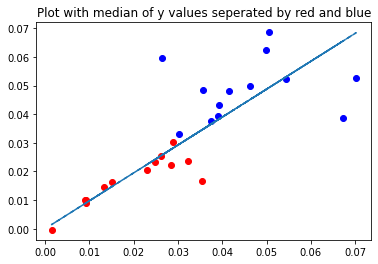

array([ 0.00211045,  0.00214971,  0.00202996,  0.00044856,  0.00284558,
        0.00320549,  0.00368152,  0.0155132 ,  0.00160446,  0.00431479,
        0.00115929,  0.00158058,  0.00117697,  0.00237046,  0.00149858,
        0.00219277,  0.00202662, -0.00950827,  0.0037539 ,  0.00573877,
        0.01342314,  0.01313353,  0.01448414,  0.00320888,  0.00883293,
        0.00303365])

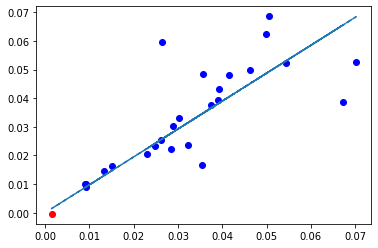

In [31]:
## your code here

med = np.median(y)
plt.title("Plot with median of y values seperated by red and blue")
plt.plot(x[y < med], y[y < med], "ro")
plt.plot(x[y > med], y[y > med], "bo")
a = np.sum(x*y)/ np.sum(x**2)
fit = a*x
plt.plot(x,fit,  '--' )
plt.show()

raten = (nrgloss / deltanrg) / numhalfcycles


ratem = np.median(raten)

plt.plot(x[y < ratem], y[y < ratem], "ro")
plt.plot(x[y > ratem], y[y > ratem], "bo")
a = np.sum(x*y)/ np.sum(x**2)
fit = a*x
plt.plot(x,fit, '--' )


##I tried to make my array similar in calculations to the array of others and used the median calculations that you told me to use however The median of the energy loss over energy change is consistently over all of our y data points
##This causes all of the data points to be blue excpet for one  in the second graph and I do not know what exactly is causing this because I am using the median of the ratio of the correct variables. Do not know why all of second graph is all red.


## Question - answer below

Is there a pattern to either of these scatter plots? Is one data type consistently above the fit line and the other below it, or are they all spread out?

In the first plot the points that are under the median value for the y array which is the calculated mechanical energy and when the values are under this they are red and when they are above which makes sense since it is the median for the Y values. 

For the second graph I do not know exactly what do do with the ratiosince it is now consistently smaller than all my data points except the bottom one whihc is the only red line. 

#Plot the residuals

Make the scatter plot per half cycle again, but this time subtract the linear fit from the y-data. So you should have a plot of $(x, y-ax)$ where $x$ is the calculated electrical energy, $y$ is the calculated mechanical energy added, and $a$ is the best-fit scaling factor

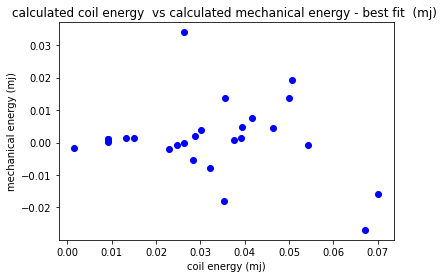

In [9]:
## your code here
x = coilnrg/numhalfcycles
y = deltanrg/numhalfcycles + nrgloss/numhalfcycles
plt.title("calculated coil energy  vs calculated mechanical energy - best fit  (mj) " )
plt.xlabel("coil energy (mj)")
plt.ylabel("mechanical energy (mj)")





a = np.sum(x*y)/ np.sum(x**2)
fit = a*x
plt.plot(x,y-a*x, 'bo');


#Make a histogram of fractional error

1. Make a histogram of the fractional error: $\frac{y - ax}{y}$, where $x$ is the calculated electrical energy, $y$ is the calculated mechanical energy added, and $a$ is the best-fit scaling factor

2. Calculate the root mean square fractional error (that is $\sqrt{\frac{1}{N}\sum_i (\frac{y_i - ax_i}{y_i})^2}$. Why did I tell you to use this instead of the standard deviation? What's the difference?

the standard deviation from the best fit line divided by the echanical energy 7 is  0.9239925551647733
The stadard deviation from the mean of the mechanical energy is  0.9111739537494558


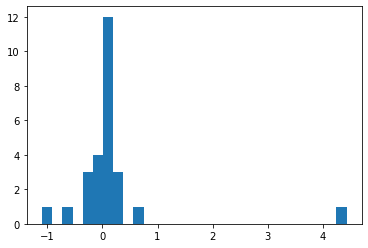

In [16]:
##your answer here
fracerr = (y-a*x)/ y

plt.hist(fracerr,bins=30);
N = np.size(fracerr)
plt.plot()
#code for the root mean
sqfrac = np.sqrt((1/N)*np.sum(fracerr**2))
stddfrac = np.std(fracerr)
print("the standard deviation from the best fit line divided by the mechanical energy  is ", sqfrac)
print("The stadard deviation from the mean of the mechanical energy is ",stddfrac)


**Why did I tell you to use this instead of the standard deviation? What's the difference?**
 
 
  Instead of using the standard deviation from the mean of all the values calculated together we are using the standard deviation against the fit line. It is better to use the change of the it line because the measures the average difference from the best fit line instead of the average difference from the mean of the data set. It is implied that the data set will go up  so we have to measure it by the standard deivation from the best fit instead of mean of the difference. The calculation also takes into acount the fractional error which takes into account how large the value was compared to the standard error experienced.




# Analysis

1. Can the electrical energy be used to measure the mechanical energy imparted to the bob?


The calculated electrical emergy and the mechanical energy imparted to the bob are related through a pretty consistent linear fit. There are numbers outside of the range however it seems that they have a linear relationship. We can use the best fit factor in our graph to find the relationship that the two energies have with eachother.


2. How accurately do you think we can estimate the amount of energy added? What limits this accuracy?

We can estimate the accuracy pretty well within the range of our fractional error that we calculated with the histogram above. Since there were values that seemed pretty extreme and outside of the range of the best fit. These values being in the data set probably hurt the accuracy and that is the limit in measuring it in our experience.  


3. Do you see any evidence of systematic errors? If so, what do you see? What might you do to correct these? 

One systematic error could be me and my partners in experience with looking at these values and knowing if something wrong was going on and letting the computer taking bad data instead of fixing an experimental problem. The first data points that we took were completly off and we had to remove them from the data set. There was also the problem with the rail and the gas nozzle being near the path of the pendulum. This could have effected the magnetic energy as the metal probably effected the trajectory of the bob. 